In [1]:
import pandas as pd
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

metro_data = pd.read_csv("Delhi metro.csv")

metro_data.head()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807


In [2]:
missing_values = metro_data.isnull().sum()

# checking data types
data_types = metro_data.dtypes

missing_values

ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

In [3]:
metro_data['Opened(Year)'] = pd.to_datetime(metro_data['Opened(Year)'])

C:\Users\91961\AppData\Local\Temp\ipykernel_15640\827135345.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  metro_data['Opened(Year)'] = pd.to_datetime(metro_data['Opened(Year)'])


In [4]:
metro_data.drop(['ID (Station ID)','Dist. From First Station(km)','Opened(Year)','Layout'], axis=1,inplace=True)

In [5]:
metro_data.describe(include="all")

,Station Names,Metro Line,Latitude,Longitude
count,285,285,285.000000,285.000000
unique,283,13,NaN,NaN
top,Ashok Park Main,Blue line,NaN,NaN
freq,2,49,NaN,NaN
mean,NaN,NaN,28.595428,77.029315
std,NaN,NaN,0.091316,2.875400
min,NaN,NaN,27.920862,28.698807
25%,NaN,NaN,28.545828,77.107130
50%,NaN,NaN,28.613453,77.207220
75%,NaN,NaN,28.666360,77.281165


In [6]:
metro_data['Station Names'].unique()

array(['Shaheed Sthal(First Station)', 'Hindon River', 'Arthala',
       'Mohan Nagar', 'Shyam park', 'Major Mohit Sharma', 'Raj Bagh',
       'Shaheed Nagar', 'Dilshad Garden', 'Jhil Mil', 'Mansarovar Park',
       'Shahdara', 'Welcome [Conn: Pink]', 'Seelampur', 'Shastri Park',
       'Kashmere Gate [Conn: Violet,Yellow]', 'Tis Hazari', 'Pul Bangash',
       'Pratap Nagar', 'Shastri Nagar', 'Inderlok [Conn: Green]',
       'Kanhaiya Nagar', 'Keshav Puram',
       'Netaji Subash Place [Conn: Pink]', 'Kohat Enclave', 'Pitam Pura',
       'Rohini East', 'Rohini West', 'Rithala(last station)',
       'Samaypur Badli(First Station)', 'Rohini Sector 18-19',
       'Haiderpur Badli Mor', 'Jahangirpuri', 'Adarsh Nagar',
       'Azadpur [Conn: Pink]', 'Model Town', 'Guru Tegh Bahadur Nagar',
       'Vishwavidyalaya', 'Vidhan Sabha', 'Civil Lines',
       'Kashmere Gate [Conn: Violet]', 'Chandni Chowk', 'Chawri Bazar',
       'New Delhi [Conn: Orange]', 'Rajiv Chowk [Conn: Blue]',
       'Pate

In [7]:
metro_data['Station Names'].unique()

array(['Shaheed Sthal(First Station)', 'Hindon River', 'Arthala',
       'Mohan Nagar', 'Shyam park', 'Major Mohit Sharma', 'Raj Bagh',
       'Shaheed Nagar', 'Dilshad Garden', 'Jhil Mil', 'Mansarovar Park',
       'Shahdara', 'Welcome [Conn: Pink]', 'Seelampur', 'Shastri Park',
       'Kashmere Gate [Conn: Violet,Yellow]', 'Tis Hazari', 'Pul Bangash',
       'Pratap Nagar', 'Shastri Nagar', 'Inderlok [Conn: Green]',
       'Kanhaiya Nagar', 'Keshav Puram',
       'Netaji Subash Place [Conn: Pink]', 'Kohat Enclave', 'Pitam Pura',
       'Rohini East', 'Rohini West', 'Rithala(last station)',
       'Samaypur Badli(First Station)', 'Rohini Sector 18-19',
       'Haiderpur Badli Mor', 'Jahangirpuri', 'Adarsh Nagar',
       'Azadpur [Conn: Pink]', 'Model Town', 'Guru Tegh Bahadur Nagar',
       'Vishwavidyalaya', 'Vidhan Sabha', 'Civil Lines',
       'Kashmere Gate [Conn: Violet]', 'Chandni Chowk', 'Chawri Bazar',
       'New Delhi [Conn: Orange]', 'Rajiv Chowk [Conn: Blue]',
       'Pate

<Axes: xlabel='Metro Line', ylabel='count'>

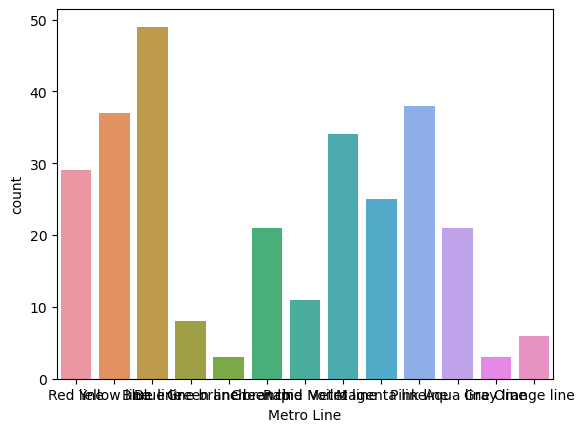

In [8]:
import seaborn as sns
sns.countplot(x='Metro Line', data=metro_data)

<Axes: xlabel='Metro Line', ylabel='count'>

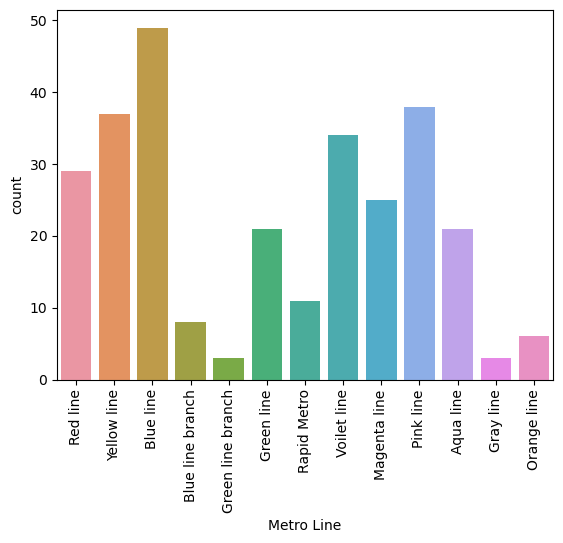

In [9]:
import matplotlib.pyplot as plt
plt.xticks(rotation="vertical")
sns.countplot(x='Metro Line', data=metro_data)


<Axes: xlabel='Metro Line', ylabel='Count'>

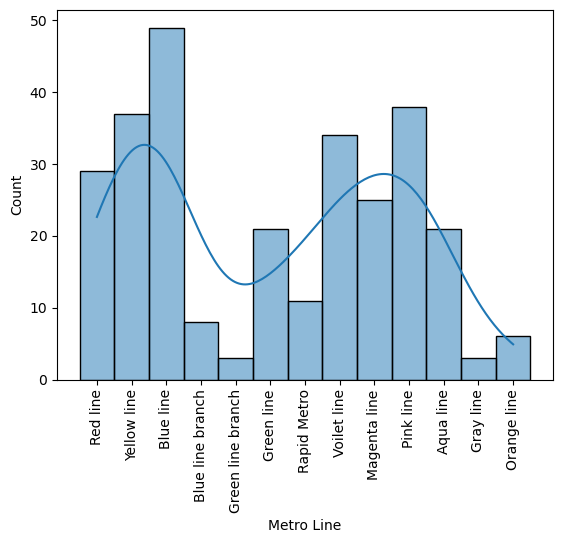

In [10]:
plt.xticks(rotation="vertical")
sns.histplot(x='Metro Line', data=metro_data,bins=40,kde=True)

In [11]:
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

In [12]:
delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=12)

# adding colored markers for each metro station with line name in tooltip
for index, row in metro_data.iterrows():
    line = row['Metro Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Names']}",
        tooltip=f"{row['Station Names']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

# Displaying the updated map
delhi_map_with_line_tooltip

In [16]:
delhi_map_with_line_tooltip.save('map.html')